# Fashion-Recommendation-System Based on User Request

### Brief Information About The Project

In this project, we will aim to choose clothes that are compatible with user preferences.
We will obtain clothing photos from popular online shopping website and ask users to rate
selected photos between 0 and 10.

In this project, we used the convolutional neural network model, which is frequently used in image processing.
The program will give the user high-scoring combinations.

    Project Members: Aybüke Aydemir
                     Eren Acarer
                     Saitcan Yıldırım


Let's start the project by installing the necessary libraries.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import simpledialog
from PIL import Image, ImageTk
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from urllib.parse import urljoin

### Download and create the dataset
We took the photos in the data set from Trendyol, one of Turkey's popular online shopping sites. 

We downloaded 400 men's topwears and 400 men's bottomwears photos and transferred the photos in a folder. While doing this process, we used the beautifulSoup library, but we did not include the code and dataset here due to ethical reasons regarding receiving and sharing the codes and photos. Instead, you can check the links and create your own dataset:

https://www.trendyol.com/erkek-pantolon-x-g2-c70?pi=13

https://www.trendyol.com/erkek-gomlek-x-g2-c75


Below are randomly selected top and bottom clothing photos from the dataset.

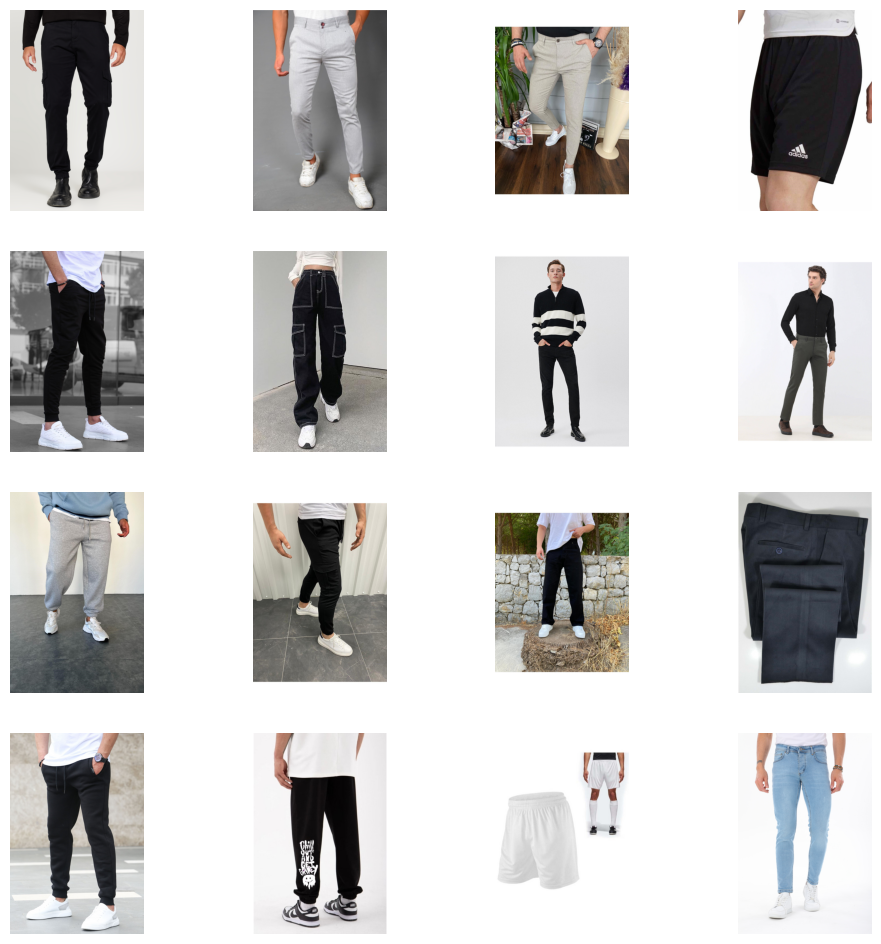

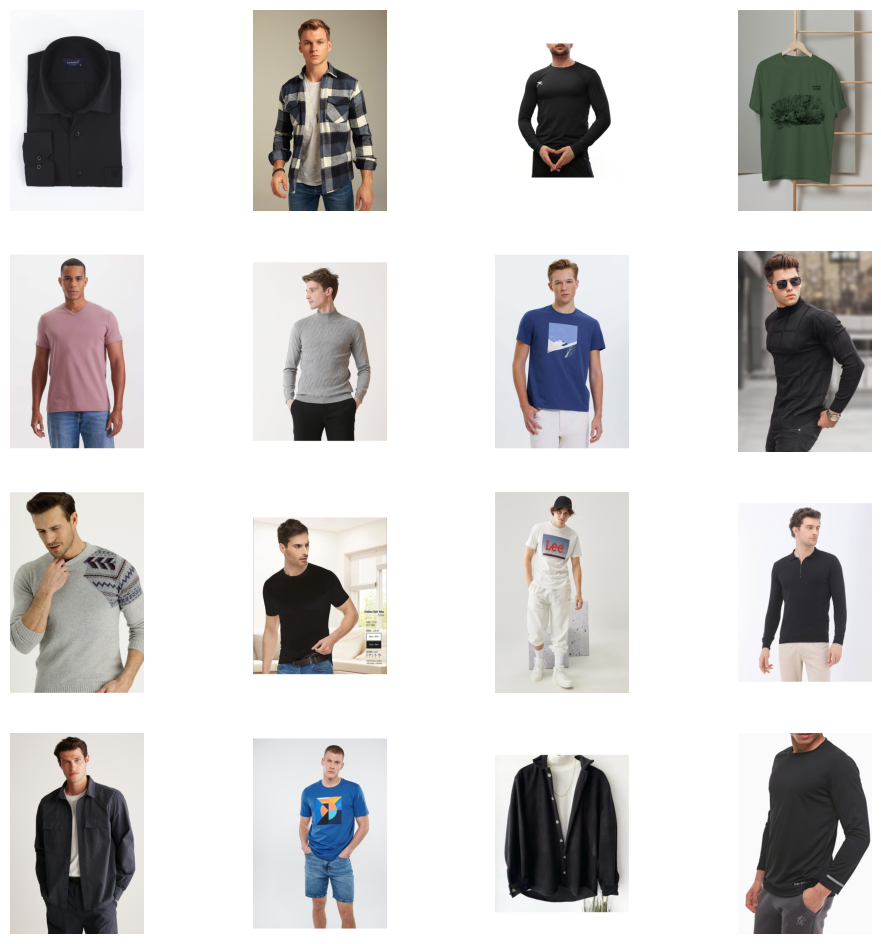

In [2]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def show_random_images(folder_path, num_images):
    image_files = random.sample(os.listdir(folder_path), num_images)

    fig, axes = plt.subplots(4, 4, figsize=(12, 12))

    for i in range(4):
        for j in range(4):
            img_path = os.path.join(folder_path, image_files[i * 4 + j])
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')

    plt.show()

if __name__ == "__main__":
    pantolon_folder = 'database/p'
    tshirt_folder = 'database/t'

    show_random_images(pantolon_folder, num_images=16)
    show_random_images(tshirt_folder, num_images=16)

In [2]:
def get_file_paths(folder_path):
    file_paths = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        file_paths.append(file_path)
    return file_paths

# Pantolon ve tişört klasörlerinin yollarını belirtin
pants_folder_path = "database/p"
tshirt_folder_path = "database/t"

# Pantolon ve tişört dosyalarının yollarını alın
pants_file_paths = get_file_paths(pants_folder_path)
tshirt_file_paths = get_file_paths(tshirt_folder_path)

### Fashion Rating App

In this part of the project, we designed an interface to score combinations more easily. 

This interface matches the first 10 topwears and 10 bottomwears photos in the dataset, respectively, shows them to the user and asks them to enter a score. 

After scoring a total of 100 combinations, the data obtained is exported as a tuple and then added to the dataframe.

In [4]:
import os
import random
import tkinter as tk
from PIL import Image, ImageTk

class FashionRatingApp:
    def __init__(self, master, pantolon_folder, tshirt_folder, num_combinations=100):
        self.master = master
        self.master.title("Kombin Puanlama Uygulamasi")

        self.pantolon_folder = pantolon_folder
        self.tshirt_folder = tshirt_folder
        self.num_combinations = num_combinations
        self.current_index = 0
        self.combination_puanlar = []

        self.combination_paths = self.get_top_combinations()
        self.canvas = tk.Canvas(master, width=300, height=300)
        self.canvas.pack()

        self.scale = tk.Scale(master, from_=0, to=10, orient=tk.HORIZONTAL, length=200)
        self.scale.pack()

        self.confirm_button = tk.Button(master, text="Onayla", command=self.confirm_rating, default=tk.ACTIVE)
        self.confirm_button.pack()

        self.show_combination()

    def get_top_combinations(self):
        pantolon_images = [os.path.join(self.pantolon_folder, img) for img in os.listdir(self.pantolon_folder)][:10]
        tshirt_images = [os.path.join(self.tshirt_folder, img) for img in os.listdir(self.tshirt_folder)][:10]

        top_combinations = [(pantolon, tshirt) for pantolon in pantolon_images for tshirt in tshirt_images]

        random.shuffle(top_combinations)
        return top_combinations[:self.num_combinations]

    def show_combination(self):
        pantolon_path, tshirt_path = self.combination_paths[self.current_index]

        pantolon_img = Image.open(pantolon_path)
        tshirt_img = Image.open(tshirt_path)

        pantolon_img = pantolon_img.resize((300, 300))
        tshirt_img = tshirt_img.resize((300, 300))

        self.pantolon_img_tk = ImageTk.PhotoImage(pantolon_img)
        self.tshirt_img_tk = ImageTk.PhotoImage(tshirt_img)

        self.canvas.config(width=600, height=350)
        self.canvas.create_image(150, 150, image=self.pantolon_img_tk, anchor=tk.CENTER)
        self.canvas.create_image(450, 150, image=self.tshirt_img_tk, anchor=tk.CENTER)

    def confirm_rating(self):
        combination_puan = self.scale.get()
        self.combination_puanlar.append(combination_puan)
        self.current_index += 1

        if self.current_index < self.num_combinations:
            self.show_combination()
        else:
            self.master.destroy()

if __name__ == "__main__":
    root = tk.Tk()

    pantolon_folder = 'database/p'
    tshirt_folder = 'database/t'

    app = FashionRatingApp(root, pantolon_folder, tshirt_folder)
    root.mainloop()


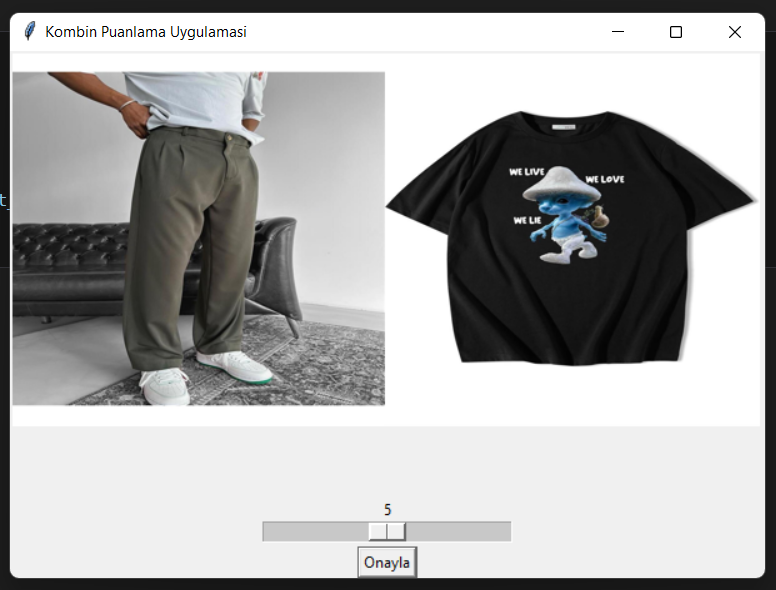

In [5]:
columns = ['Puan']
df_puanlar = pd.DataFrame(app.combination_puanlar , columns=columns)
df_yollar = pd.DataFrame(app.combination_paths, columns=['pants_path', 'tshirt_path'])
df_combined = pd.concat([df_yollar, df_puanlar['Puan']], axis=1)
df_combined

,pants_path,tshirt_path,Puan
0,database/p\p (104).jpg,database/t\t (107).jpg,4
1,database/p\p (103).jpg,database/t\t (103).jpg,8
2,database/p\p (107).jpg,database/t\t (104).jpg,10
3,database/p\p (104).jpg,database/t\t (102).jpg,7
4,database/p\p (100).jpg,database/t\t (100).jpg,10
...,...,...,...
95,database/p\p (102).jpg,database/t\t (105).jpg,9
96,database/p\p (100).jpg,database/t\t (102).jpg,2
97,database/p\p (101).jpg,database/t\t (106).jpg,3
98,database/p\p (100).jpg,database/t\t (105).jpg,8


In [6]:
df_combined.to_csv('kombin_puanlar.csv', index=False)
print("Sonuçlar başarıyla 'kombin_puanlar.csv' dosyasına kaydedildi.")

Sonuçlar başarıyla 'kombin_puanlar.csv' dosyasına kaydedildi.


### İmage Processing and Normalization

The dimensions of the photographs in the dataset are 2400 * 2600. Since it is difficult and takes a lot of time to process with these dimensions, we change the dimensions of the photographs to 150 * 150 with the load_image function.

Additionally, after converting to numpy array, we divided the values by 255, that is, the maximum pixel value. 

Thus, we have completed the normalization process here. In this way, pixel values were compressed between 0 and 1, making it possible to analyze model data more easily.

In [3]:
def load_image(path):
    image = Image.open(path)
    image = image.resize((150,150))
    image = np.array(image) / 255.0 # normalizayon işlemi 

    return image

In [4]:
df = pd.read_csv('kombin_puanlar.csv')

X_pants = np.array(df['pants_path'].apply(load_image).tolist())
X_tshirt = np.array(df['tshirt_path'].apply(load_image).tolist())
y = df['Puan'].values


In [5]:
X_pants_train, X_pantolon_test, X_tshirt_train, X_tshirt_test, y_train, y_test = train_test_split(
    X_pants, X_tshirt, y, test_size=0.2, random_state=42)


### Creating Model With CNN

In this study, was used to design the CNN model. The architecture includes key components such as convolutional layers, activation functions, pooling layers, and fully connected layers

#### What are Convolutional Neural Networks (CNN)?

CNN is a type of deep learning model that works specifically with 2D or 3D data. It is widely used in tasks such as image recognition, object detection and classification.

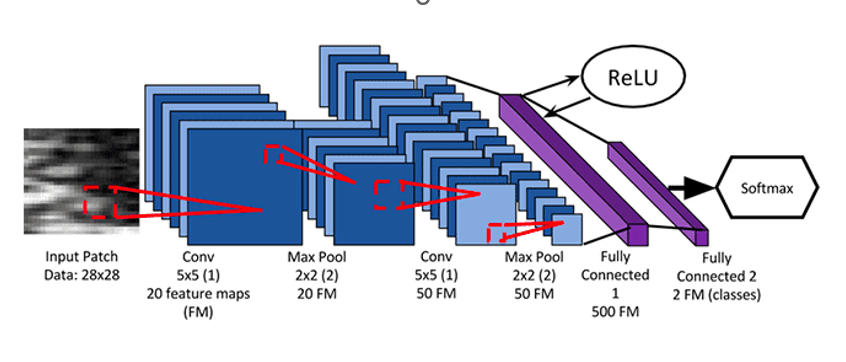


#### Scope of application:

Image recognition: Object recognition, face recognition, character recognition, etc.
Medical imaging: Analysis of MRI, CT scans.
Automotive industry: Object detection for autonomous vehicles.
Natural language processing: Text classification, language modeling.


#### Network Architectures:

Common CNN architectures include models such as LeNet, AlexNet, VGGNet, GoogLeNet (Inception), ResNet.

#### Layers:

Convolution Layers: Applies the convolution process on the input data. It learns different features with different filters.
Pooling Layers: Used to reduce convolution results and highlight features.
Fully Connected Layers: Used to perform classification or regression by taking the flattened feature map.

#### Learning:

Weights in CNNs are trained with techniques such as backpropagation and gradient descent. This allows the network to minimize the error rate on a given task.

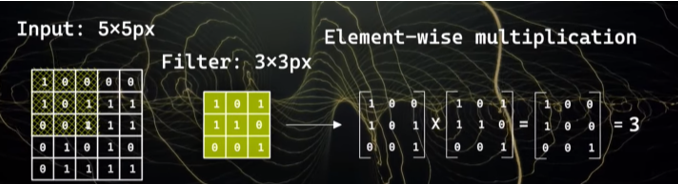

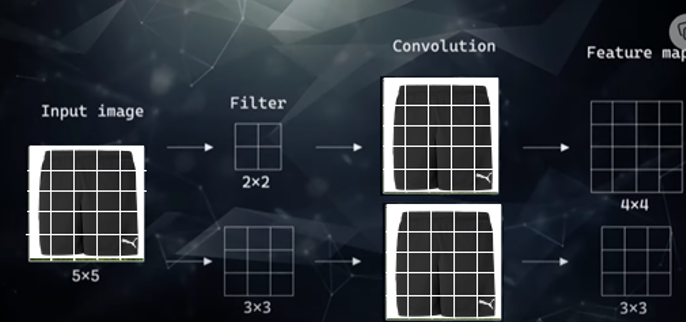

To minimize the loss of learning data, model training was performed. Hyperparameters such as loss function, learning rate, and number of epochs are carefully tuned. Additionally, regularization techniques such as dropout and batch normalization are used to improve the overall performance of the network. 

During the optimization process, the optimization algorithms SGD (Stochastic Gradient Descent) and Adam were compared. 


#### What is a Filter?

A filter is a matrix used to highlight a particular feature or pattern. For example, it can be used to extract features such as edges, corners, color transitions.

Filters are used in convolution layers. During the convolution process, the filter is shifted over the input data and a sum of products is calculated at each position. This highlights certain features in the input data.

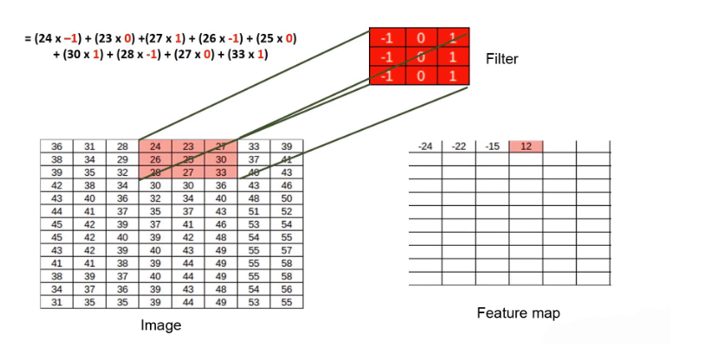

Filters are parameters learned by the model during training. Throughout the training process, filters are adjusted to best perform a particular task.

#### Can CNN (Convolutional Neural Network) also be used in regression tasks?

CNNs are generally known for classification tasks, but can also be used successfully in regression tasks. Here are some cases of using CNN in regression tasks and basic information on how it is implemented:

##### Output Layer and Activation Function:

In regression tasks, the activation function is generally not used in the output layer or a linear activation function is preferred. Linear activation produces any real number directly as output.

output = Dense(1, activation='linear')(input_layer)

##### Loss Function:

Loss functions frequently used in regression tasks include Mean Squared Error (MSE). MSE calculates the mean square difference of predictions to actual values.

model.compile(optimizer='adam', loss='mean_squared_error')

In [6]:
from keras.layers import Input, Concatenate, Dense, Flatten
from keras.models import Model

img_width, img_height, img_channels = 150, 150, 3  # belirlediğimiz boyular 
input_shape = (img_width, img_height, img_channels)
model = models.Sequential() # modeli oluşturduğumuz kısım


pantolon_input = Input(shape=input_shape, name='pantolon_input')
pantolon_model = layers.Conv2D(32, (3, 3), activation='relu')(pantolon_input)
pantolon_model = layers.MaxPooling2D((2, 2))(pantolon_model)
pantolon_model = layers.Conv2D(64, (3, 3), activation='relu')(pantolon_model)
pantolon_model = layers.MaxPooling2D((2, 2))(pantolon_model)
pantolon_model = layers.Conv2D(128, (3, 3), activation='relu')(pantolon_model)
pantolon_model = layers.MaxPooling2D((2, 2))(pantolon_model)
pantolon_model = layers.Flatten()(pantolon_model)

tshirt_input = Input(shape=input_shape, name='tshirt_input')
tshirt_model = layers.Conv2D(32, (3, 3), activation='relu')(tshirt_input)
tshirt_model = layers.MaxPooling2D((2, 2))(tshirt_model)
tshirt_model = layers.Conv2D(64, (3, 3), activation='relu')(tshirt_model)
tshirt_model = layers.MaxPooling2D((2, 2))(tshirt_model)
tshirt_model = layers.Conv2D(128, (3, 3), activation='relu')(tshirt_model)
tshirt_model = layers.MaxPooling2D((2, 2))(tshirt_model)
tshirt_model = layers.Flatten()(tshirt_model)

# Pantolon ve tişört modellerini birleştirme
merged = Concatenate()([pantolon_model, tshirt_model])

merged = Dense(256, activation='relu')(merged)

output = Dense(1, activation='linear')(merged)

# Modeli oluşturma
model = Model(inputs=[pantolon_input, tshirt_input], outputs=output)

### Training and Optimization of The Model

The compile function prepares the model before training. The optimization algorithm used at this stage was determined as "adam" (Adaptive Moment Estimation) and the loss function was determined as "mean_squared_error".

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit([X_pants, X_tshirt], y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10

3/3 [==============================] - 4s 921ms/step - loss: 215.5236 - val_loss: 55.0358
Epoch 2/10
3/3 [==============================] - 2s 678ms/step - loss: 36.7290 - val_loss: 34.7082
Epoch 3/10
3/3 [==============================] - 2s 667ms/step - loss: 25.7496 - val_loss: 28.9664
Epoch 4/10
3/3 [==============================] - 2s 656ms/step - loss: 21.4193 - val_loss: 18.9013
Epoch 5/10
3/3 [==============================] - 2s 655ms/step - loss: 17.5363 - val_loss: 13.4255
Epoch 6/10
3/3 [==============================] - 2s 628ms/step - loss: 16.4836 - val_loss: 15.0966
Epoch 7/10
3/3 [==============================] - 2s 650ms/step - loss: 15.2154 - val_loss: 14.9405
Epoch 8/10
3/3 [==============================] - 2s 650ms/step - loss: 14.2305 - val_loss: 13.8624
Epoch 9/10
3/3 [==============================] - 2s 656ms/step - loss: 12.8237 - val_loss: 13.6340
Epoch 10/10
3/3 [==============================] - 2s 640ms/step - loss: 10.6359 - val_loss: 12.2

#### interpretation of training results

In the first epoch the training loss is quite high (215.5236), but it starts to decrease in each subsequent epoch. This may indicate that the model is starting to learn the training data.
Validation loss also generally tends to decrease, but fluctuates slightly after the 6th epoch.

A low training loss is a positive sign, but a significantly higher validation loss than the training loss may be an indication of overfitting. The model may have overfitted the training data.

As the number of epochs increases, the training loss continues to decrease, while the validation loss becomes invariant after a while. In this case, it is conceivable that the model may have learned very specific to the training data and its generalization ability may be limited.
Optimization Progress:

If the training loss decreases over time, it indicates that the optimization algorithm (man) has successfully tuned the parameters of the model.
Loss Values and Performance:

In the last epoch, training and validation losses reached low values (10.6359 and 12.2469). This may indicate that the model performs well on a particular regression task.

### Predicting the scores of combinations

Since it took too long to score all possible combinations, we used only 150 topwears and 150 bottomwears photos here. We passed all possible combinations of these through the model and added the predicted scores into a list.

In [1]:
unrated_pants_paths = pants_file_paths[50:200]
unrated_tshirt_paths = tshirt_file_paths[50:200]

all_ratings = []

for pants_path in unrated_pants_paths:
    for tshirt_path in unrated_tshirt_paths:
        img_p = load_image(pants_path)
        img_t = load_image(tshirt_path)  
        rating = model.predict([img_p.reshape(1, *img_p.shape),img_t.reshape(1, *img_t.shape)])
        all_ratings.append((pants_path, tshirt_path, rating))
  

In [12]:
column_names =['pants_path', 'tshirt_path','Puan']
df_rating = pd.DataFrame(all_ratings, columns=column_names)
df_rating

,pants_path,tshirt_path,Puan
0,database/p\p (144).jpg,database/t\t (144).jpg,[[2.2910182]]
1,database/p\p (144).jpg,database/t\t (145).jpg,[[2.4222362]]
2,database/p\p (144).jpg,database/t\t (146).jpg,[[2.3554854]]
3,database/p\p (144).jpg,database/t\t (147).jpg,[[2.541189]]
4,database/p\p (144).jpg,database/t\t (148).jpg,[[2.547125]]
...,...,...,...
22495,database/p\p (279).jpg,database/t\t (275).jpg,[[2.692578]]
22496,database/p\p (279).jpg,database/t\t (276).jpg,[[2.6753838]]
22497,database/p\p (279).jpg,database/t\t (277).jpg,[[2.6284652]]
22498,database/p\p (279).jpg,database/t\t (278).jpg,[[2.6213148]]


In [13]:
df_rating.to_csv('rating_prediction.csv', index=False)
print("Sonuçlar başarıyla 'rating_prediction.csv' dosyasına kaydedildi.")

Sonuçlar başarıyla 'rating_prediction.csv' dosyasına kaydedildi.


In [4]:
df_rating = pd.read_csv('rating_prediction.csv')

In [5]:
import ast
df_rating['Puan'] = df_rating['Puan'].apply(lambda x: ast.literal_eval(x)[0][0])


In [6]:
df_rating.head()

,pants_path,tshirt_path,Puan
0,database/p\p (144).jpg,database/t\t (144).jpg,2.291018
1,database/p\p (144).jpg,database/t\t (145).jpg,2.422236
2,database/p\p (144).jpg,database/t\t (146).jpg,2.355485
3,database/p\p (144).jpg,database/t\t (147).jpg,2.541189
4,database/p\p (144).jpg,database/t\t (148).jpg,2.547125


In [7]:
df_sorted = df_rating.sort_values(by='Puan', ascending=False)

# Sıralanmış DataFrame'i görüntüleme
print(df_sorted)

                   pants_path             tshirt_path      Puan
22582  database/p\p (115).jpg   database/t\t (11).jpg  4.694891
22532  database/p\p (110).jpg   database/t\t (11).jpg  4.659208
22592  database/p\p (116).jpg   database/t\t (11).jpg  4.653009
22580  database/p\p (115).jpg  database/t\t (108).jpg  4.613245
22530  database/p\p (110).jpg  database/t\t (108).jpg  4.577562
...                       ...                     ...       ...
3032   database/p\p (162).jpg  database/t\t (173).jpg  1.220756
3110   database/p\p (162).jpg  database/t\t (243).jpg  1.217546
3036   database/p\p (162).jpg  database/t\t (177).jpg  1.213414
3057   database/p\p (162).jpg  database/t\t (196).jpg  1.203614
3081   database/p\p (162).jpg  database/t\t (217).jpg  1.128955

[22700 rows x 3 columns]


### Recommendation App

We designed the interface to present the 3 combinations with the most points to the user in line with the predictions of the model. The 3 combinations with the most points will be presented to the user respectively.

In [8]:
import tkinter as tk
from tkinter import Label, Button, Canvas
from PIL import Image, ImageTk

class RecommendationApp:
    def __init__(self, master, top_combinations):
        self.master = master
        self.master.title("Moda Öneri Sistemi")

        self.top_combinations = top_combinations
        self.current_index = 0

        self.combination_label = Label(self.master, text="", font=("Helvetica", 12))
        self.combination_label.pack()

        # Canvas widget'ını oluşturun
        self.canvas = Canvas(self.master, width=600, height=300)
        self.canvas.pack()

        self.next_button = Button(self.master, text="Sonraki Kombin", command=self.show_next_combination)
        self.next_button.pack()

        # ImageTk nesnelerini saklamak için değişkenler ekleyin
        self.pants_img_tk = None
        self.tshirt_img_tk = None

        self.show_next_combination()

    def show_next_combination(self):
        if self.current_index < len(self.top_combinations):
            combination = self.top_combinations.iloc[self.current_index]

            pants_img = Image.open(combination['pants_path']).resize((300, 300))
            tshirt_img = Image.open(combination['tshirt_path']).resize((300, 300))

            self.pants_img_tk = ImageTk.PhotoImage(pants_img)
            self.tshirt_img_tk = ImageTk.PhotoImage(tshirt_img)

            self.combination_label.config(text=f"Puan: {combination['Puan']}")
            self.canvas.delete("all")  # Canvas'ı temizleyin
            self.canvas.create_image(150, 150, image=self.pants_img_tk, anchor=tk.CENTER)
            self.canvas.create_image(450, 150, image=self.tshirt_img_tk, anchor=tk.CENTER)

            self.current_index += 1
        else:
            self.master.destroy()

top_combinations = df_sorted.head(3)

root = tk.Tk()
app = RecommendationApp(root, top_combinations)
root.mainloop()


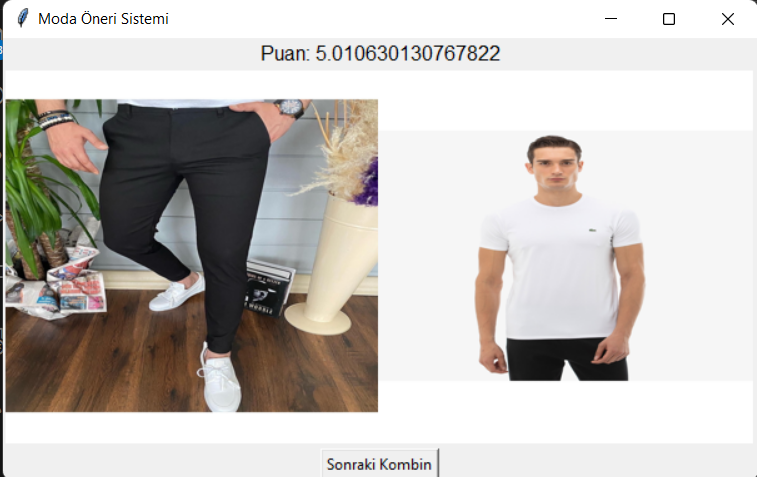